In [1]:
import numpy as np
import tensorflow as tf
# from matplotlib import cm
from matplotlib import pyplot as plt
import cv2
from utils import *

In [3]:
# model = tf.keras.models.load_model('model/SVGG.h5',custom_objects={'CC_Pen': CC_Pen})
model = tf.keras.models.load_model('model/VGG19-L4.h5')

(1, 224, 224, 3)
(224, 224, 3)


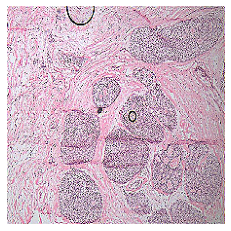

In [5]:
img_array, _ = load_imgs(["./Images\\原位性\\04 (8).jpg"],["浸润性","良性","原位性"])
print(img_array.shape)
img = laplace_4(img_array[0])
print(img.shape)
plt.axis('off')
plt.imshow(img)
plt.show()

- 原位[1 0 0]
- 浸润[0 1 0]
- 良性[0 0 1]

In [6]:
preds = model.predict(img_array)
print("Predicted:", preds)

Predicted: [[0.00185313 0.0156321  0.9825148 ]]


In [7]:
last_conv_layer_name = 'block5_conv4'
classifier_layer_names = ['block5_pool', 'flatten', 'dense', 'dense_1', 'dense_2']
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)
heatmap.shape

(14, 14)

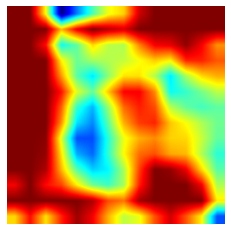

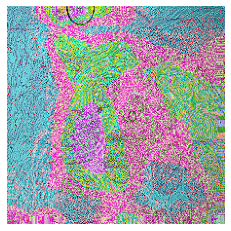

In [8]:
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
plt.axis('off')
plt.imshow(heatmap)
plt.savefig('./static/In-suit-SVGG-heatmap.png',bbox_inches='tight',dpi=300,pad_inches=0)
plt.show()

superimposed_img = (heatmap * 0.1 + img)/1.1
superimposed_img = np.uint8(255*superimposed_img)
plt.axis('off')
plt.imshow(superimposed_img)
plt.savefig('./static/In-suit-SVGG-superimposed.png',bbox_inches='tight',dpi=300,pad_inches=0)
plt.show()